# Exploratory Data Analysis for Super Market Sales

# Part-1


Complete all the basic exploratory steps.

# Part-2

1. Is your supermarket more popular with males or females? 

2. What does the customer rating look like and can you also comment on its skewness?

3. What can you say about the aggregate sales across the branches? 

4. Which is the most popular payment method used by customers?


# Part-3

1. Does gross income affect customer ratings? 
2. Which is the most profitable branch? 
3. How is the relationship between Gender and Gross income? 
4. Can you see any time trend in gross income? 
5. Which product line helps you generate the most income? 
6. What is the spending pattern of both males and females, meaning in which category do they spend more? 
7. How many products are bought by customers? 
8. Which day of the week has maximum sales? 
9. Which hour of the day is busiest? 
10. Which product line should your supermarket focus on? 
11. Which city should be chosen for expansion and what products should be focussed on?

# Solution

# Part 1: Basic Exploratory steps

In [13]:
# Importing recquired libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# Importing data sets
df = pd.read_csv('C:\\Users\\Deepak Kumar\\Desktop\\Santhu Laptop\\Data_Science\EDA project\\supermarket sales Sheet1.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [5]:
# Checking for null values
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

There are no null values.

Understanding feature

In [4]:
# Datatypes, shape and size of the data sets
df.info()
print('Shape of the given data set is', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
# count, mean. std, min and max for the columns
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [6]:
# Catogorical data
df.describe(include = ['object'])

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,227-50-3718,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


In [8]:
#finding duplicate values
df.duplicated().sum()

0

# Part-2
# 1. Is your supermarket more popular with males or females?

Female    501
Male      499
Name: Gender, dtype: int64


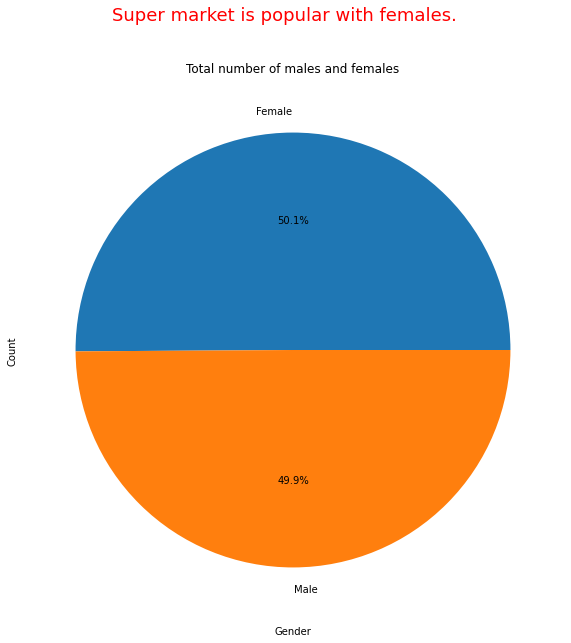

In [40]:
#countin total numbers in each category
height = df['Gender'].value_counts()

#checking numbers
print(height)

#creating category based on numbers

gender = ['Female', 'Male']
#creating plot

fig = plt.figure(figsize=(10,10))

plt.pie(height,labels = gender, autopct='%1.1f%%')
plt.title("Total number of males and females")
plt.xlabel("Gender")
plt.ylabel("Count")
#show plot
plt.suptitle("Super market is popular with females.", color='red', fontsize=18)
plt.show()

# 2. What does the customer rating look like and can you also comment on its skewness?

In [8]:
# taking rating column and sorting values ascending to plot 
rating= df.iloc[:,-1]
sorted_rating = rating.sort_values()
sorted_rating

848     4.0
672     4.0
72      4.0
618     4.0
876     4.0
       ... 
62     10.0
60     10.0
159    10.0
853    10.0
387    10.0
Name: Rating, Length: 1000, dtype: float64

In [9]:
# Average Rating of Supermarket
rating.mean()

6.972700000000003

C:\Rakesh\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


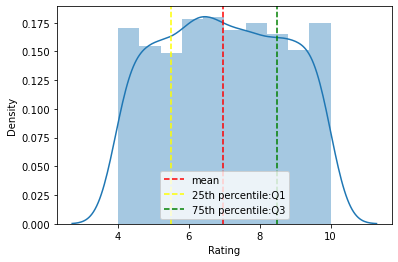

In [14]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']),c= 'red', ls='--',label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c= 'yellow', ls='--',label='25th percentile:Q1')
plt.axvline(x=np.percentile(df['Rating'],75),c= 'green', ls='--',label='75th percentile:Q3')
plt.legend()

Date-wise ratings

In [21]:
#changing data type of date
df['Date'] = pd.to_datetime(df['Date'])


# 3. What can you say about the aggregate sales across the branches?

In [261]:
#grouping total sales by different branches 
br_wise = df.groupby(('Branch')).agg({'Total': 'mean'})
#converting arrays into indexes
br_wise = br_wise.reset_index()
br_wise


,Branch,Total
0,A,312.354031
1,B,319.872506
2,C,337.099715


0    312.354031
1    319.872506
2    337.099715
Name: Total, dtype: float64


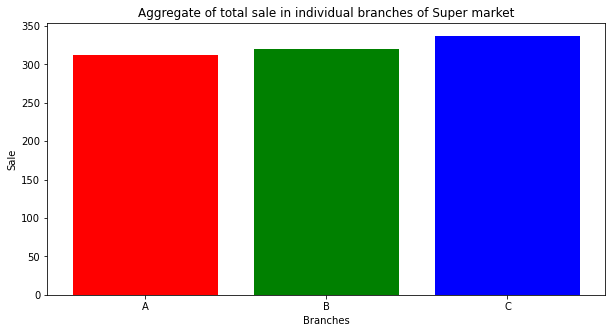

The aggregate of sale of all branches of Super market is 322.96674899999994


In [263]:
#countin total numbers in each category
height = br_wise['Total']

#checking numbers
print(height)

#creating category based on numbers

branch = br_wise['Branch']
#creating plot

fig = plt.figure(figsize=(10,5))

plt.bar(branch,height, color=['red','green','blue'])
plt.title("Aggregate of total sale in individual branches of Super market")
plt.xlabel("Branches")
plt.ylabel("Sale")
#show plot

plt.show()

#aggregate of all branches
print("The aggregate of sale of all branches of Super market is", df["Total"].mean())

# 4. Which is the most popular payment method used by customers?

In [17]:
#counting each categories 
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


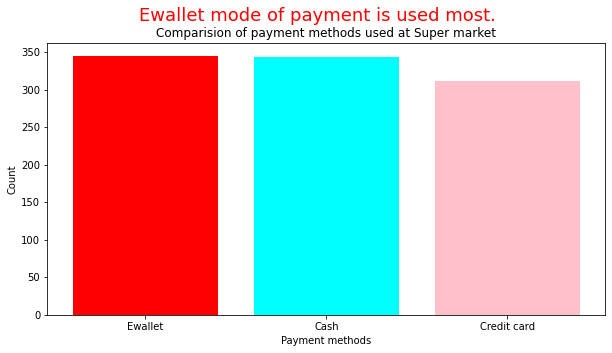

In [18]:
#counting total numbers in each category
height = df['Payment'].value_counts()

#checking numbers
print(height)

#creating category based on numbers

mode = ['Ewallet', 'Cash', 'Credit card']
#creating plot

fig = plt.figure(figsize=(10,5))

plt.bar(mode, height, color=['red','cyan','pink'])
plt.title("Comparision of payment methods used at Super market")
plt.xlabel("Payment methods")
plt.ylabel("Count")
#show plot
plt.suptitle("Ewallet mode of payment is used most.", color='red', fontsize=18)
plt.show()

# Part 3
# 1. Does gross income affect customer ratings?

Lets take only Gross income and Ratings columns to plot a line graph

<function matplotlib.pyplot.show(close=None, block=None)>

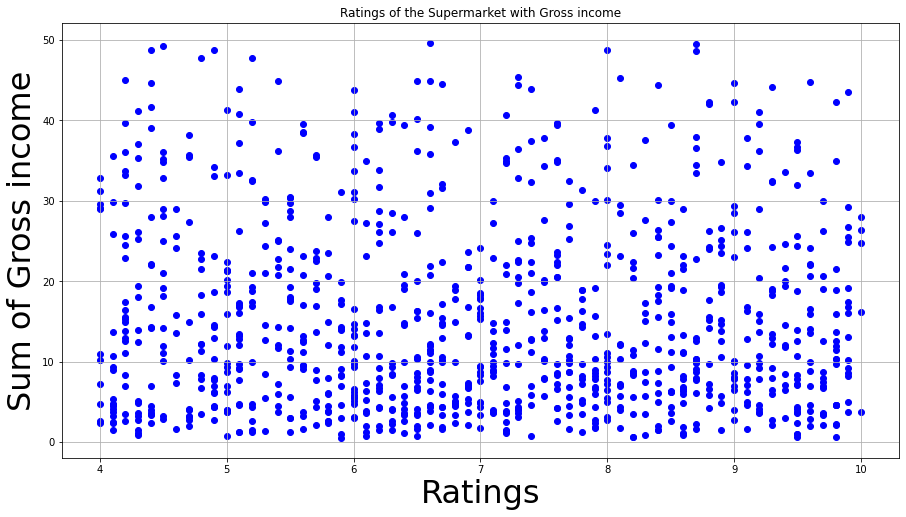

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline


x= df.Rating
y=df['gross income']

fig = plt.figure(figsize=(15,8))

plt.scatter(x,y,color='b')
plt.title("Ratings of the Supermarket with Gross income")

plt.xlabel("Ratings", fontsize=32)
plt.ylabel("Sum of Gross income", fontsize=32)
plt.grid(True)
plt.show

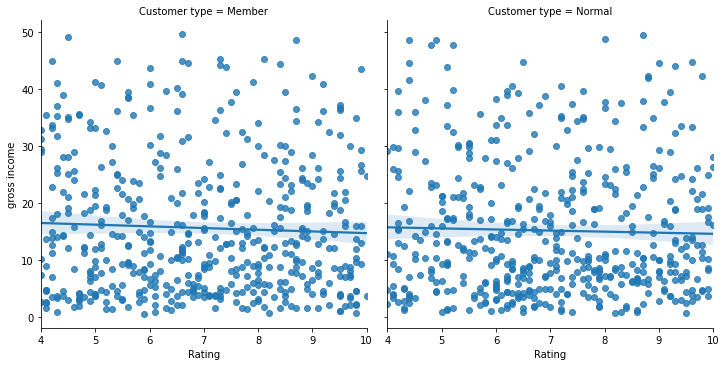

In [43]:
#We could see two kind of customers
sns.lmplot(x='Rating', y='gross income', data = df, col='Customer type')

No, from above plots, we can come to conclusion that, gross income doesn't affect customer ratings.

# 2. Which is the most profitable branch?

In [20]:
#calculating A branch gross income
A_income = filtered_af['gross income'].sum()
A_income

5057.1605

In [21]:
#calculating B branch gross income
B_income = filtered_bf['gross income'].sum()
B_income

5057.032

In [22]:
#calculating C branch gross income
C_income = filtered_cf['gross income'].sum()
C_income

5265.1765

[5057.1605, 5057.032, 5265.1765]


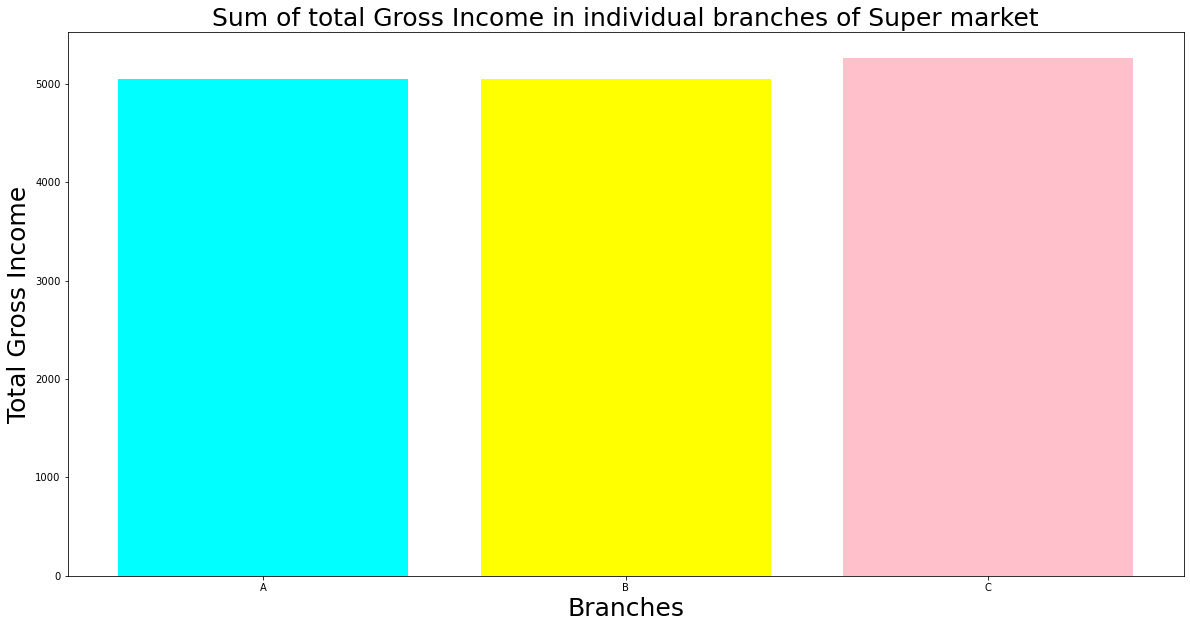

Super market C is profitable


In [23]:
#countin total numbers in each category
height = [A_income, B_income,C_income]

#checking numbers
print(height)

#creating category based on numbers

branch = ['A','B','C']
#creating plot

fig = plt.figure(figsize=(20,10))

plt.bar(branch,height, color=['cyan','yellow','pink'])
plt.title("Sum of total Gross Income in individual branches of Super market", fontsize=25)
plt.xlabel("Branches", fontsize = 25)
plt.ylabel("Total Gross Income", fontsize=25)
#show plot
plt.show()

#printing which branch has highest profit by comparing all three branches 
print("Super market C is profitable")

# 3.How is the relationship between Gender and Gross income?

In [24]:
#filtering female data
value_list = ["Female"]
boolean_series = df.Gender.isin(value_list)
filtered_female = df[boolean_series]
Female_income = filtered_female['gross income'].sum()
Female_income

7994.425

In [25]:
#filtering male data
value_list = ["Male"]
boolean_series = df.Gender.isin(value_list)
filtered_male = df[boolean_series]
Male_income = filtered_male['gross income'].sum()
Male_income

7384.9439999999995

[7994.425, 7384.9439999999995]


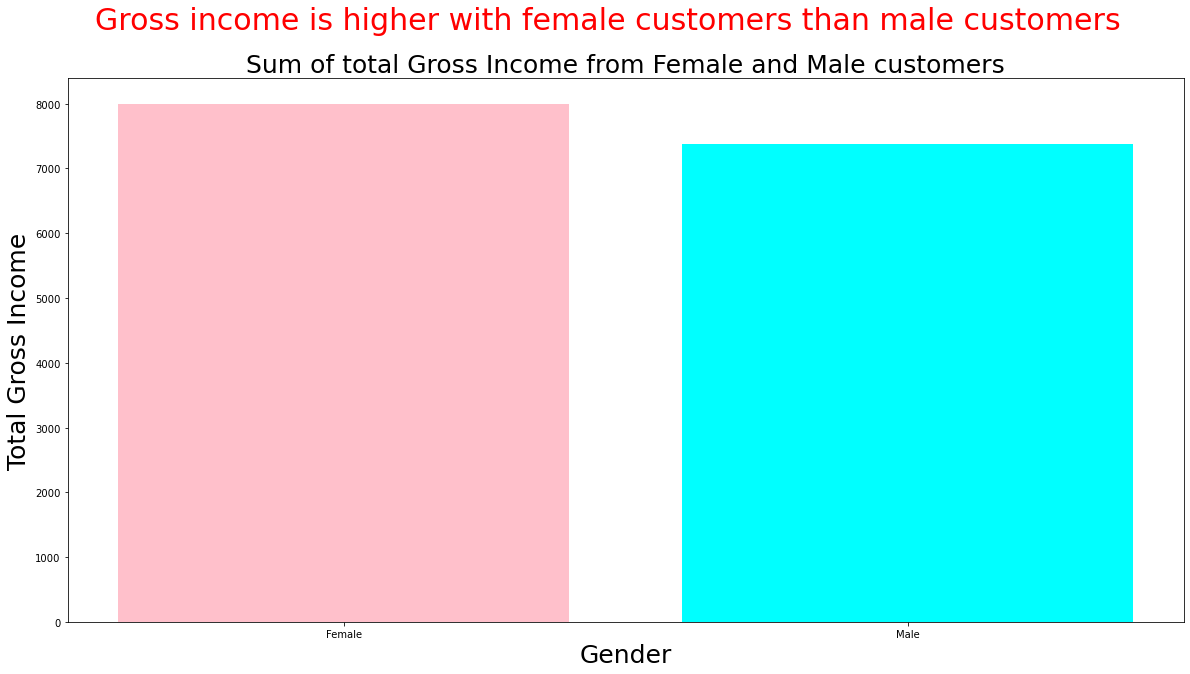

In [26]:
#countin total numbers in each category
height = [Female_income,Male_income]

#checking numbers
print(height)

#creating category based on numbers

gender = ['Female','Male']
#creating plot

fig = plt.figure(figsize=(20,10))

plt.bar(gender,height, color=['pink','cyan'])
plt.title("Sum of total Gross Income from Female and Male customers", fontsize=25)
plt.suptitle('Gross income is higher with female customers than male customers', fontsize=30, color='red')
plt.xlabel("Gender", fontsize = 25)
plt.ylabel("Total Gross Income", fontsize=25)
#show plot

plt.show()

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

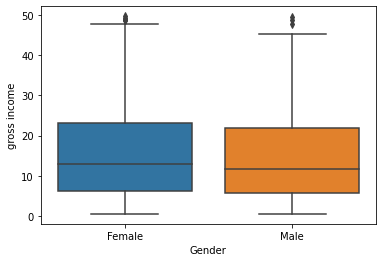

In [44]:
sns.boxplot(x='Gender', y='gross income', data = df)

There is slightly higher mean gross income for females

# 4. Can you see any time trend in gross income?

<AxesSubplot:xlabel='Date', ylabel='gross income'>

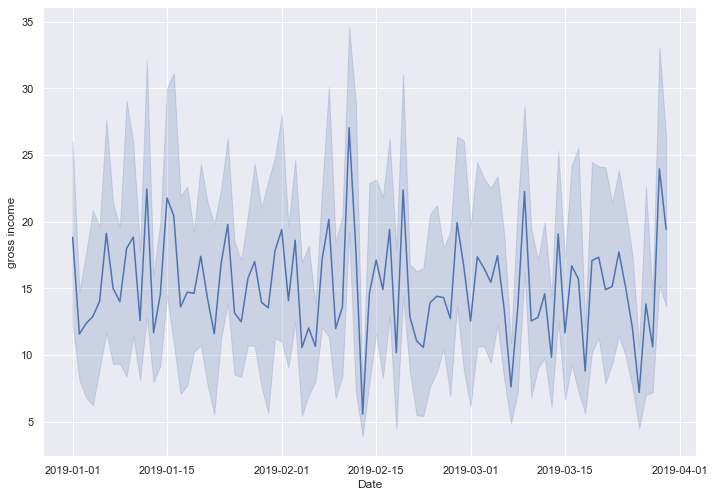

In [46]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x='Date',y='gross income', data= df)


As we can see there is no such time trend.

# 5. Which product line helps you generate the most income?


In [412]:
#grouping gross income by different product lines
product_wise = df.groupby(('Product line')).agg({'gross income': 'sum'})
modified = product_wise.reset_index()
modified

,Product line,gross income
0,Electronic accessories,2587.5015
1,Fashion accessories,2585.9950
2,Food and beverages,2673.5640
3,Health and beauty,2342.5590
4,Home and lifestyle,2564.8530
5,Sports and travel,2624.8965


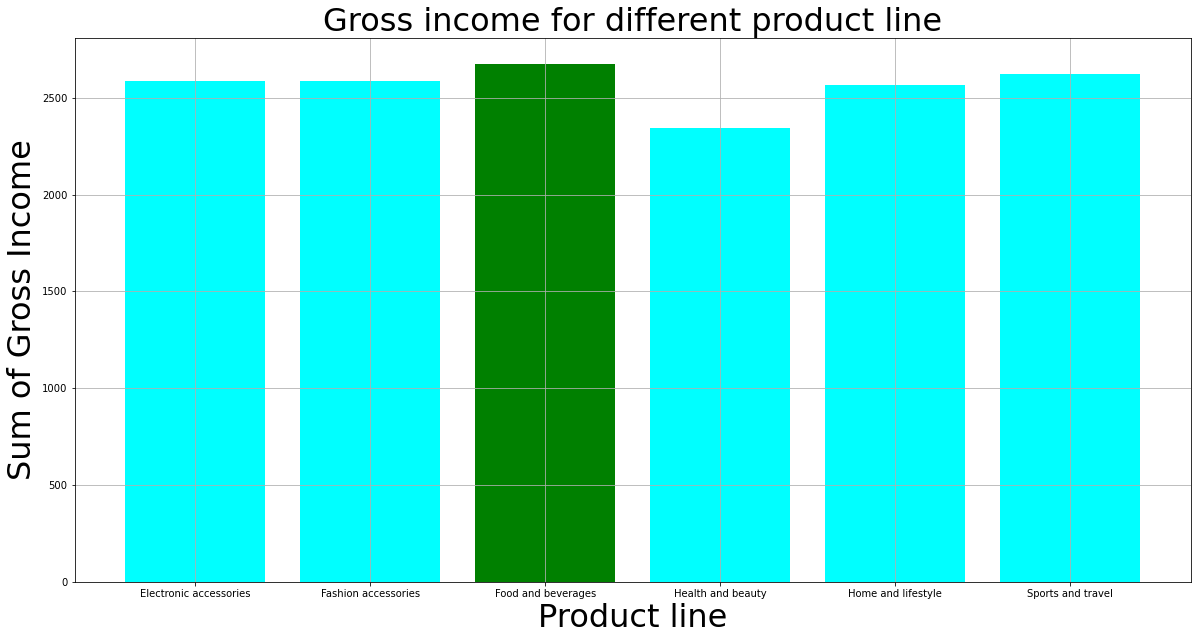

Food and Beverages brings up most income


In [234]:
#creating plot of different products producing income individualy 

x=modified['Product line']
y=modified['gross income']

fig = plt.figure(figsize=(20,10))

plt.bar(x,y, color=['cyan','cyan','green','cyan','cyan','cyan'])

plt.title("Gross income for different product line", fontsize=32)
plt.xlabel("Product line", fontsize=32)
plt.ylabel("Sum of Gross Income", fontsize=32)
plt.grid(True)
plt.show()

#printing which product line is fetching highest income compared to all others
print("Food and Beverages brings up most income")

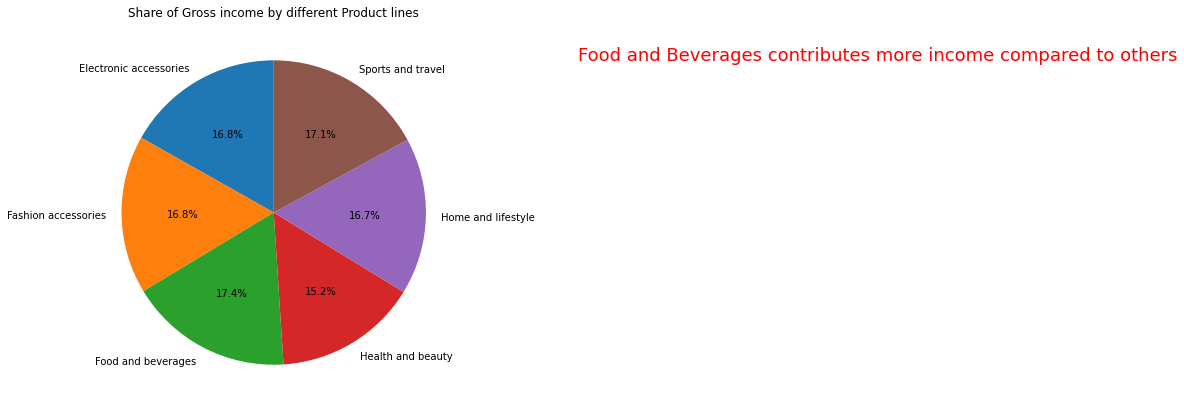

In [257]:
#creating pie graph showing which product line has more income 
#pie graph eases the insights
product = modified['gross income']

Category = modified['Product line']

fig = plt.figure(figsize = (10,7))

plt.pie(product, labels = Category, autopct ='%1.1f%%', startangle=90)
plt.title("Share of Gross income by different Product lines")
plt.text(2,1, "Food and Beverages contributes more income compared to others",color='red', fontsize=18)
plt.show()


# 6. What is the spending pattern of both males and females, meaning in which category do they spend more?

<AxesSubplot:xlabel='Product line', ylabel='count'>

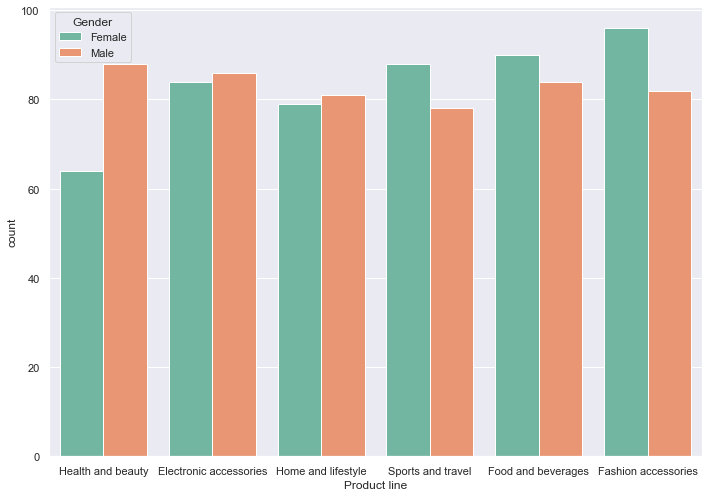

In [50]:
sns.countplot(x=df['Product line'], hue= df.Gender, palette='Set2')

From above plot we can conclude that male customer spend more on Health and Beauty products and females on Fashion accessories

# 7. How many products are bought by customers?

C:\Rakesh\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity', ylabel='count'>

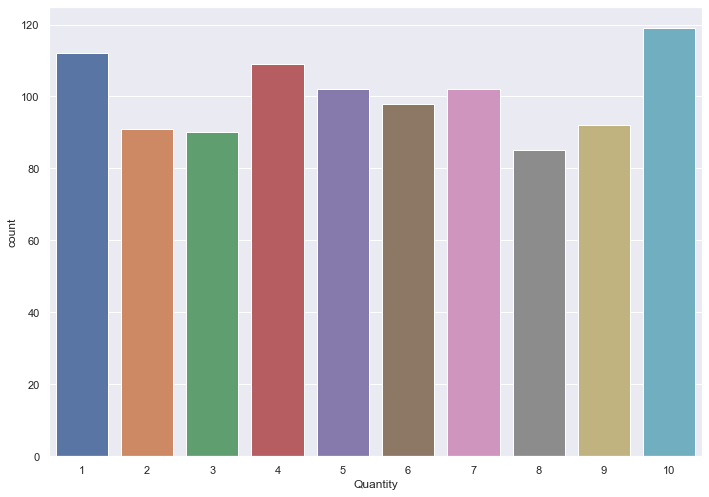

In [53]:
#total quantities bought by the customers

sns.countplot(df['Quantity'])

Customers had bought 10 quantities more followed by single quantity

# 8. Which day of the week has maximum sales?

In [54]:
#converting date fromat to required date format

df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

#finding out day for given date
day_wise = df['Date'].dt.day_name()
df['Day'] = day_wise
df['Day']

0      Saturday
1        Friday
2        Sunday
3        Sunday
4        Friday
         ...   
995     Tuesday
996    Saturday
997    Saturday
998      Friday
999      Monday
Name: Day, Length: 1000, dtype: object

In [55]:
#fetching total sales on different days by using groupby function
total_day = df.groupby(('Day')).agg({'Total': 'sum'})
#array should be converted in to index 
total_day = total_day.reset_index()
total_day

,Day,Total
0,Friday,43926.3405
1,Monday,37899.0780
2,Saturday,56120.8095
3,Sunday,44457.8925
4,Thursday,45349.2480
5,Tuesday,51482.2455
6,Wednesday,43731.1350


In [56]:
#as days will be in alphabetical order, we have change it to desired weekly order using groupby and reindex function
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_weekday = total_day.groupby(['Day']).sum().reindex(cats) 
df_weekday = df_weekday.reset_index()
df_weekday

,Day,Total
0,Monday,37899.0780
1,Tuesday,51482.2455
2,Wednesday,43731.1350
3,Thursday,45349.2480
4,Friday,43926.3405
5,Saturday,56120.8095
6,Sunday,44457.8925


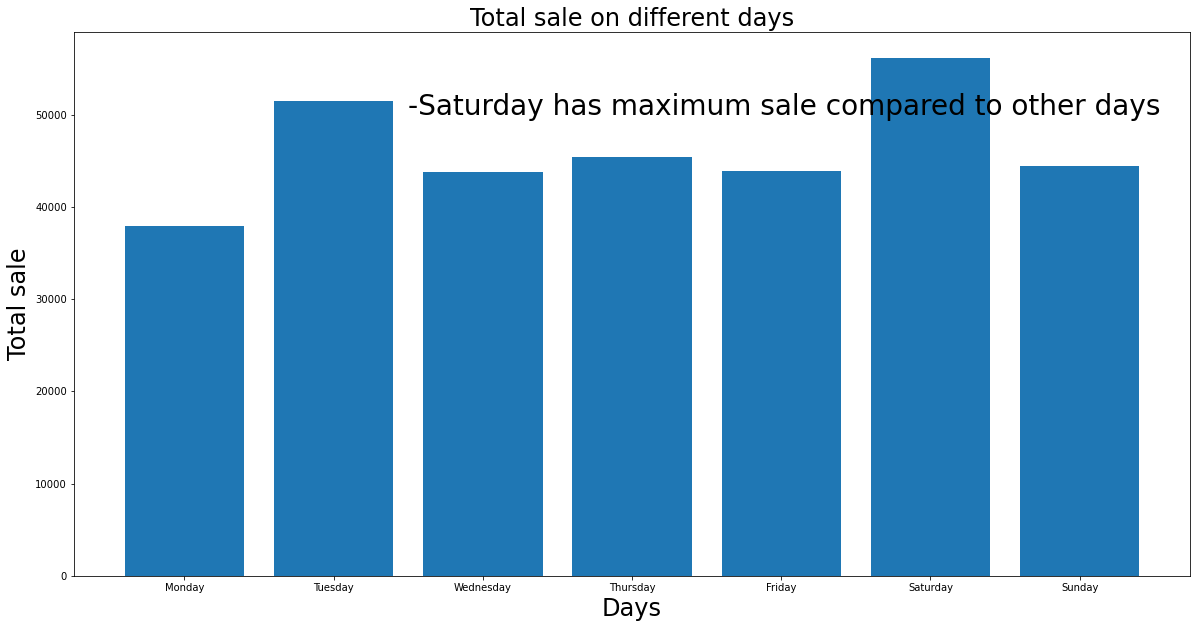

In [358]:
#now we got desired data, so we could plot a bar plot
fig = plt.figure(figsize=(20,10))

plt.bar(df_weekday['Day'],df_weekday['Total'])

plt.title("Total sale on different days", fontsize=24)
plt.text(1.5,50000,"-Saturday has maximum sale compared to other days", fontsize=28)
plt.ylabel("Total sale", fontsize=24)
plt.xlabel("Days", fontsize=24)
plt.show()
#cooment is done on the graph

# 9. Which hour of the day is busiest?

In [61]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour
df['Hour']

0      13
1      10
2      13
3      20
4      10
       ..
995    13
996    17
997    13
998    15
999    13
Name: Hour, Length: 1000, dtype: int64

In [64]:
hourly_customers= df['Hour'].value_counts().reset_index()


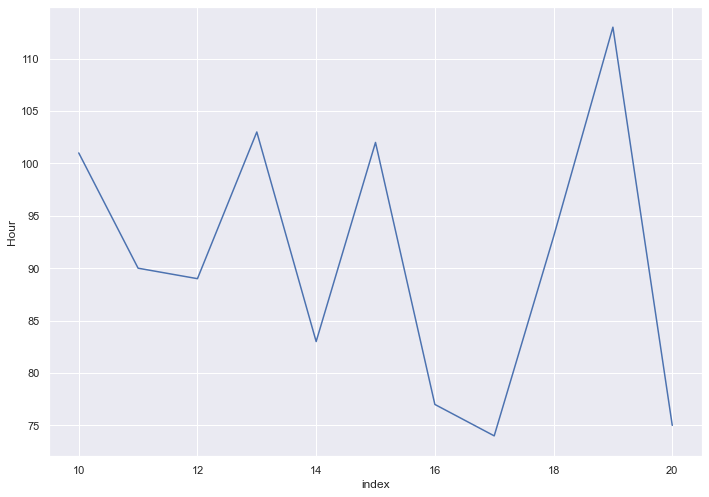

In [66]:
sns.lineplot(x='index', y='Hour', data=hourly_customers)
sns.set(rc={'figure.figsize':(14,7)})

We could see that 19th hour i.e 7pm hour has highest sales

# 10. Which product line should your supermarket focus on?

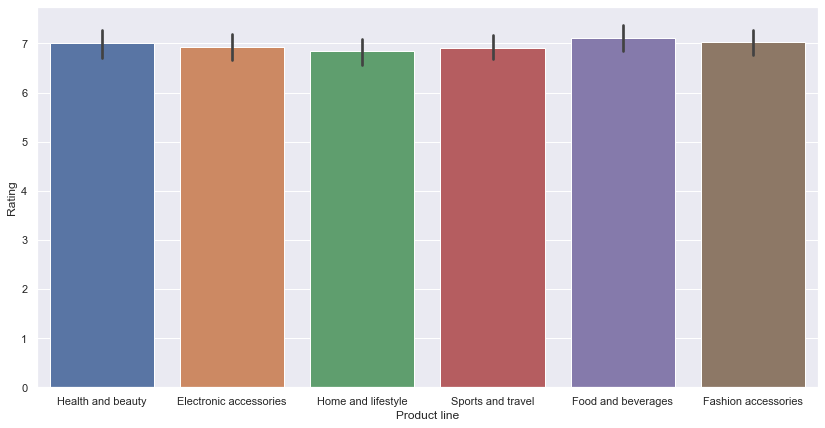

In [68]:
sns.barplot(x='Product line', y='Rating', data=df)
sns.set(rc={'figure.figsize':(14,7)})

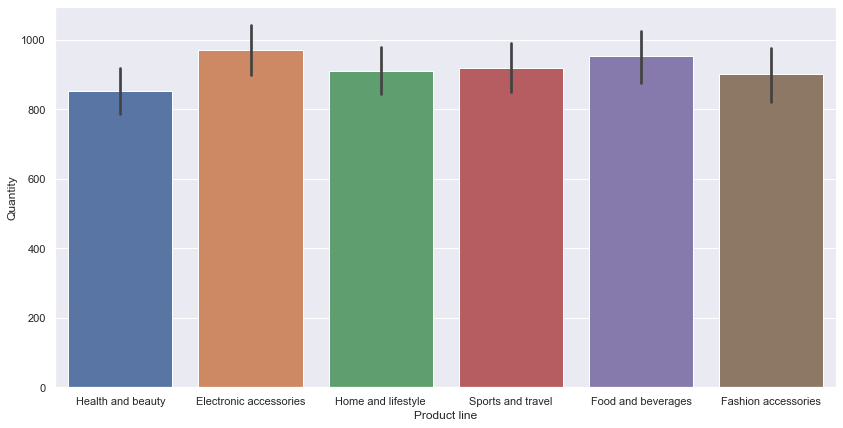

In [69]:
sns.barplot(x='Product line', y='Quantity', data=df, estimator=sum)
sns.set(rc={'figure.figsize':(14,7)})

We can focus on two factor, depending on quantities or customer ratings.

# 11. Which city should be chosen for expansion and what products should be focussed on?

<AxesSubplot:xlabel='City', ylabel='gross income'>

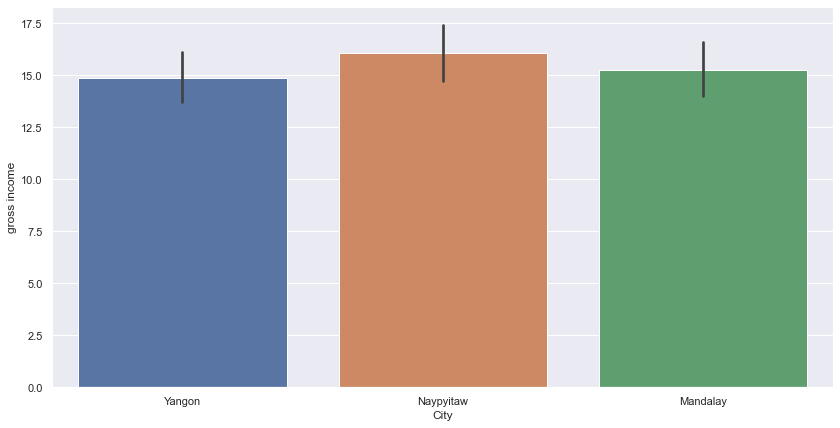

In [80]:
sns.barplot(x='City', y='gross income', data =df)#,estimator=sum)

<AxesSubplot:xlabel='Product line', ylabel='count'>

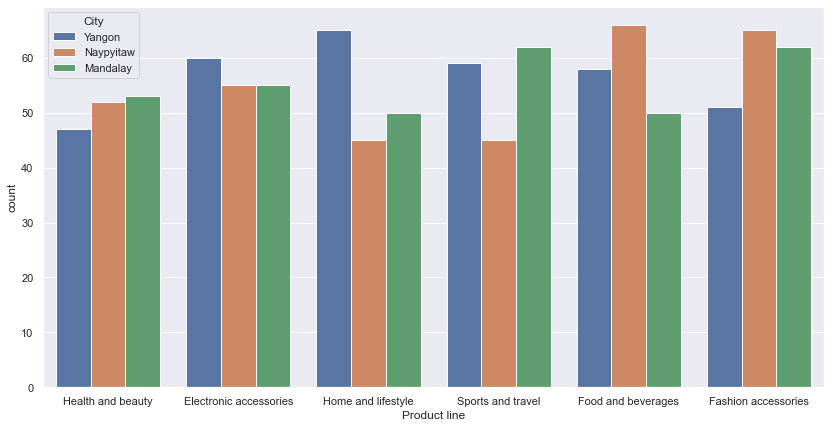

In [83]:
sns.countplot(x='Product line', hue= 'City', data = df)

Since Food and beverages and Fashion accessories have huge sales in Naypyitaw city, if these products are focused more in terms of logistics, stocking, quality and other aspects expansion would be profitable.